#Imports e base de dados

In [ ]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/souzag/D.S.-Python/master/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Convertendo para strings
colunas_com_objeto = df.select_dtypes(include="object").columns
df[colunas_com_objeto]=df[colunas_com_objeto].astype("string")

In [ ]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [ ]:
new_cols = ['Idade (anos)', 'Sexo', 'Tipo de dor no peito', 'Pressão sanguínea em repouso (mm Hg)', 'Colesterol (mm/dl)', 'Açúcar no sangue em jejum', 
            'Resultados de eletrocardiograma em repouso', 'Frequência cardíaca máxima alcançada', 'Angina induzida por exercício', 'Oldpeak',
            'Inclinação do segmento ST de pico do exercício', 'Diagnóstico']
new_names_map = {df.columns[i]:new_cols[i] for i in range(len(new_cols))}

df.rename(new_names_map, axis=1, inplace=True)

df.head()

,Idade (anos),Sexo,Tipo de dor no peito,Pressão sanguínea em repouso (mm Hg),Colesterol (mm/dl),Açúcar no sangue em jejum,Resultados de eletrocardiograma em repouso,Frequência cardíaca máxima alcançada,Angina induzida por exercício,Oldpeak,Inclinação do segmento ST de pico do exercício,Diagnóstico
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#Estatística descritiva e inferência

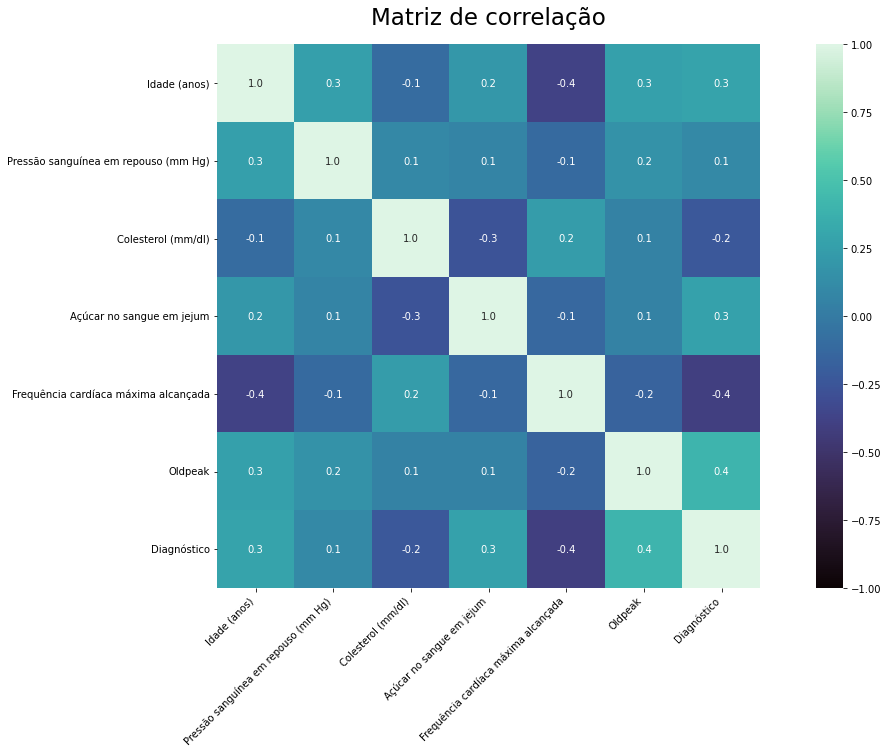

In [ ]:
corr = df.corr()

plt.figure(figsize=(20, 10))

ax = sns.heatmap(
    corr, 
    annot=True,
    fmt='.1f',
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("mako", as_cmap=True),
    square=True
)

ax.set_title('Matriz de correlação', pad=20, fontsize=23)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation='horizontal')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=10
);

##Distribuições

In [ ]:
fig=px.histogram(df, 
                 x="Diagnóstico",
                 color="Sexo",
                 hover_data=df.columns,
                 title="Distribuição de Casos de Doenças Cardíacas",
                 barmode="group").update_layout(yaxis_title="Quantidade (pessoas)")
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

fig.write_image("yourfile.png")

In [ ]:
fig=px.histogram(df,
                 x="Tipo de dor no peito",
                 color="Sexo",
                 hover_data=df.columns,
                 title="Distribuição de tipos de dores no peito",
                ).update_layout(yaxis_title="Quantidade (pessoas)")
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="Sexo",
                 hover_data=df.columns,
                 color='Sexo',
                 title="Distribuição dos sexos na base de dados").update_layout(yaxis_title="Quantidade (pessoas)")
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="Resultados de eletrocardiograma em repouso",
                 hover_data=df.columns,
                 title="Distribuição do Eletrocardiograma em Repouso").update_layout(yaxis_title="Quantidade (pessoas)")
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

##Pairplot das variáveis

[]

<Figure size 1080x720 with 0 Axes>

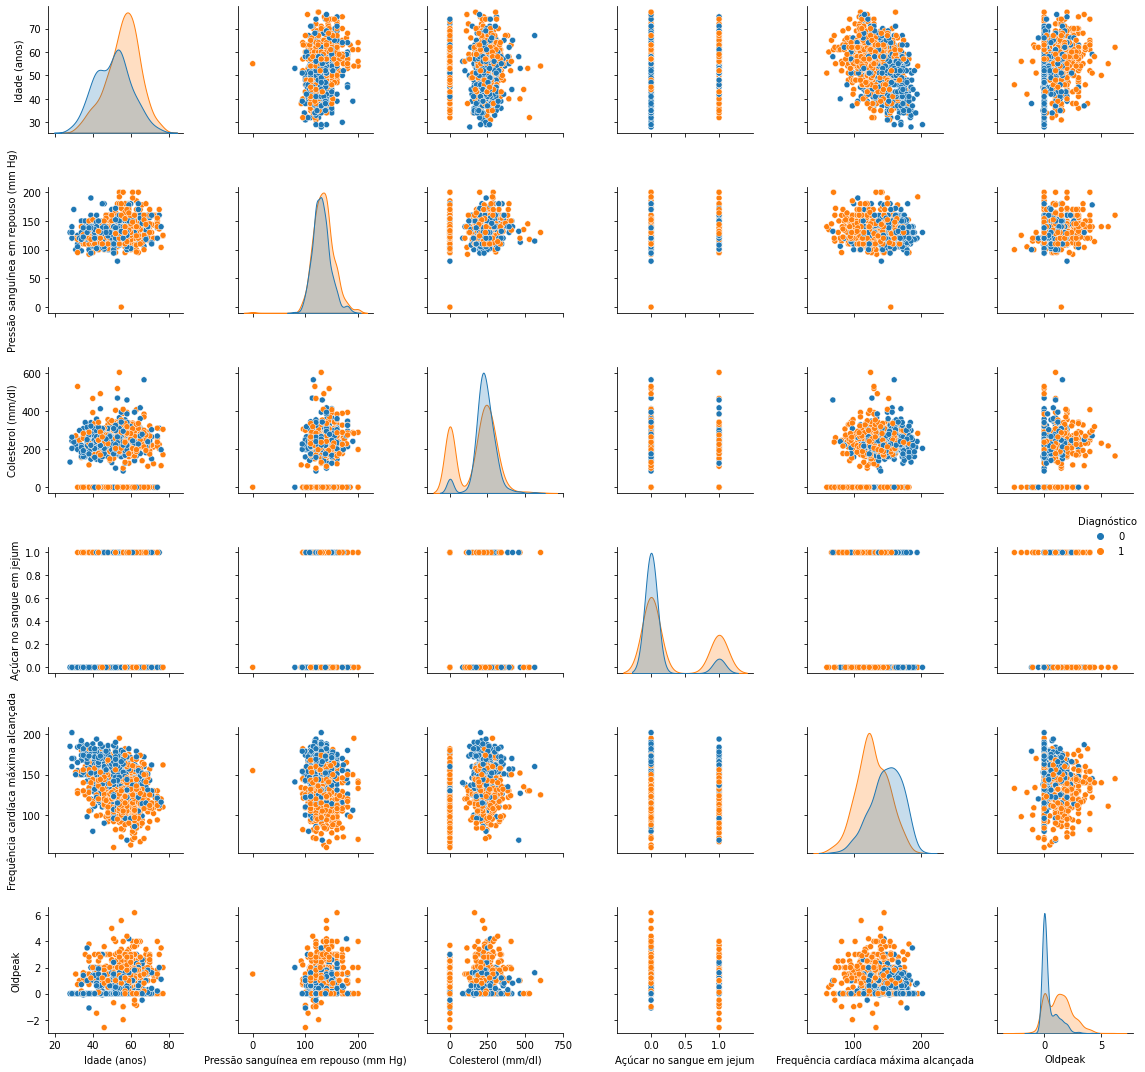

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df, hue="Diagnóstico")
plt.tight_layout()
plt.plot()

##Linearidade das variáveis

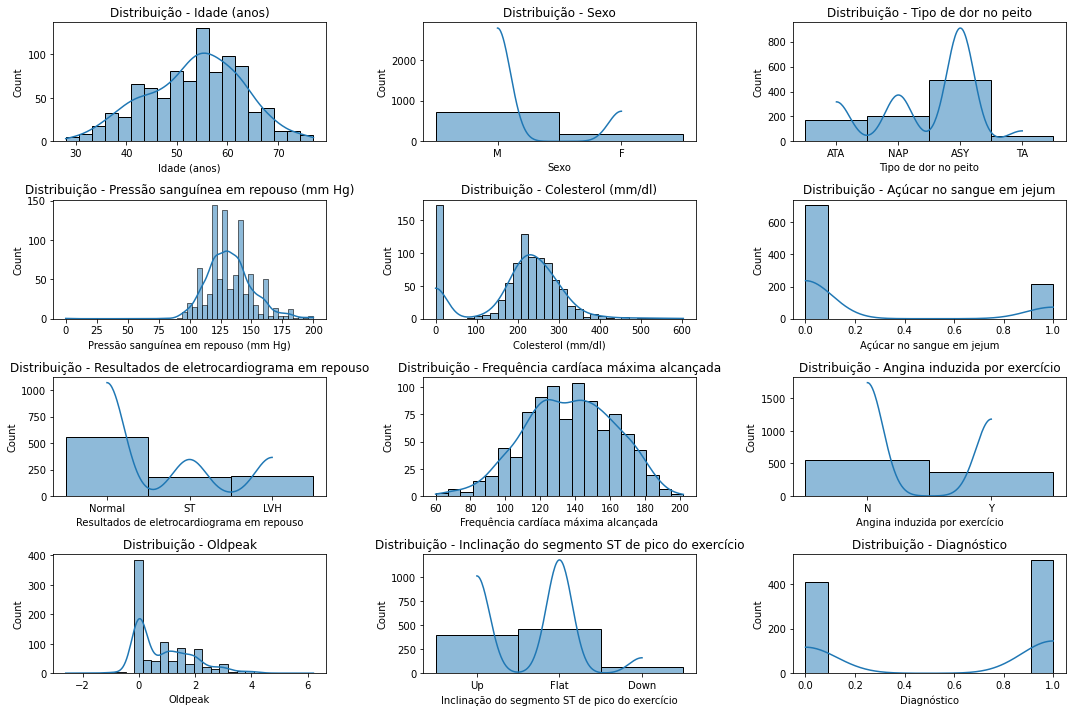

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribuição - {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

##Boxplots

In [ ]:
fig = px.box(df, y='Idade (anos)', x='Diagnóstico', title='Distribuição pela idade', width=800, height=600)
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
fig = px.box(df,y="Pressão sanguínea em repouso (mm Hg)", x="Diagnóstico", title=f"Distribuição da pressão sanguínea em repouso", 
             color="Sexo", width=1200, height=700)
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
fig = px.box(df,y="Colesterol (mm/dl)",x="Diagnóstico",title=f"Distribuição do Colesterol", width=1200, height=700)
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
fig = px.box(df,y="Oldpeak", x="Diagnóstico",title=f"Distribuição do Oldpeak")
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [ ]:
fig = px.box(df,y="Frequência cardíaca máxima alcançada", x="Diagnóstico",title=f"Distribuição da Frequência Cardíaca Máxima Alcançada", height=700)
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

#Pré-processamento

In [ ]:
#Verificando a presença de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Idade (anos)                                    918 non-null    int64  
 1   Sexo                                            918 non-null    string 
 2   Tipo de dor no peito                            918 non-null    string 
 3   Pressão sanguínea em repouso (mm Hg)            918 non-null    int64  
 4   Colesterol (mm/dl)                              918 non-null    int64  
 5   Açúcar no sangue em jejum                       918 non-null    int64  
 6   Resultados de eletrocardiograma em repouso      918 non-null    string 
 7   Frequência cardíaca máxima alcançada            918 non-null    int64  
 8   Angina induzida por exercício                   918 non-null    string 
 9   Oldpeak                                    

In [ ]:
df.dtypes
#Atributos como sexo, tipo de dor no peito e outros estão como objetos, quando na verdade deveriam ser strings.

Idade (anos)                                        int64
Sexo                                               string
Tipo de dor no peito                               string
Pressão sanguínea em repouso (mm Hg)                int64
Colesterol (mm/dl)                                  int64
Açúcar no sangue em jejum                           int64
Resultados de eletrocardiograma em repouso         string
Frequência cardíaca máxima alcançada                int64
Angina induzida por exercício                      string
Oldpeak                                           float64
Inclinação do segmento ST de pico do exercício     string
Diagnóstico                                         int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade (anos),918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Pressão sanguínea em repouso (mm Hg),918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol (mm/dl),918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Açúcar no sangue em jejum,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
Frequência cardíaca máxima alcançada,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
Diagnóstico,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


##Robust Scaler

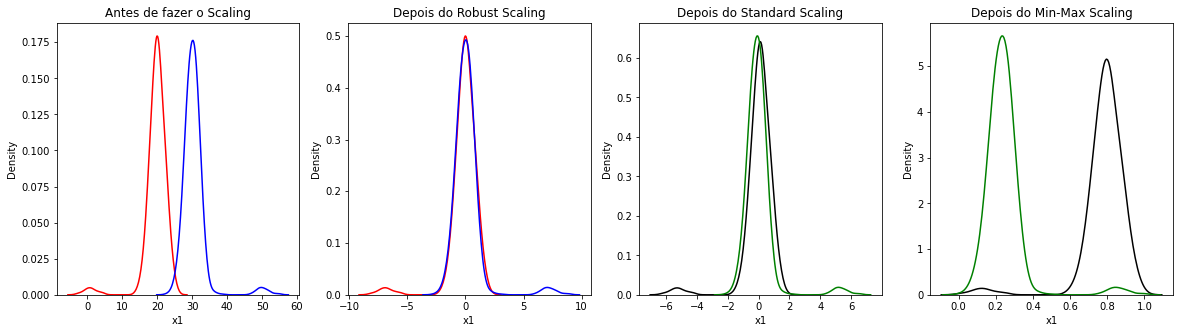

In [ ]:
x = pd.DataFrame({'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]), 
                  'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)])})

np.random.normal
scaler = preprocessing.RobustScaler()

robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Antes de fazer o Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('Depois do Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('Depois do Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('Depois do Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

##Lidando com variáveis categóricas

In [ ]:
string_col=df.select_dtypes("string").columns.to_list()

num_col=df.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove("Diagnóstico")

In [ ]:
df[string_col].head()
for col in string_col:
    print(f"A distribuição da variável categórioca {col} is : ")
    print(df[col].value_counts())

A distribuição da variável categórioca Sexo is : 
M    725
F    193
Name: Sexo, dtype: Int64
A distribuição da variável categórioca Tipo de dor no peito is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: Tipo de dor no peito, dtype: Int64
A distribuição da variável categórioca Resultados de eletrocardiograma em repouso is : 
Normal    552
LVH       188
ST        178
Name: Resultados de eletrocardiograma em repouso, dtype: Int64
A distribuição da variável categórioca Angina induzida por exercício is : 
N    547
Y    371
Name: Angina induzida por exercício, dtype: Int64
A distribuição da variável categórioca Inclinação do segmento ST de pico do exercício is : 
Flat    460
Up      395
Down     63
Name: Inclinação do segmento ST de pico do exercício, dtype: Int64


In [ ]:
#Usando Label Encoding
df_tree = df.apply(preprocessing.LabelEncoder().fit_transform)
df_tree.head()

,Idade (anos),Sexo,Tipo de dor no peito,Pressão sanguínea em repouso (mm Hg),Colesterol (mm/dl),Açúcar no sangue em jejum,Resultados de eletrocardiograma em repouso,Frequência cardíaca máxima alcançada,Angina induzida por exercício,Oldpeak,Inclinação do segmento ST de pico do exercício,Diagnóstico
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [ ]:
#Usando Hot Enconding

df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,Idade (anos),Pressão sanguínea em repouso (mm Hg),Colesterol (mm/dl),Açúcar no sangue em jejum,Frequência cardíaca máxima alcançada,Oldpeak,Diagnóstico,Sexo_F,Sexo_M,Tipo de dor no peito_ASY,Tipo de dor no peito_ATA,Tipo de dor no peito_NAP,Tipo de dor no peito_TA,Resultados de eletrocardiograma em repouso_LVH,Resultados de eletrocardiograma em repouso_Normal,Resultados de eletrocardiograma em repouso_ST,Angina induzida por exercício_N,Angina induzida por exercício_Y,Inclinação do segmento ST de pico do exercício_Down,Inclinação do segmento ST de pico do exercício_Flat,Inclinação do segmento ST de pico do exercício_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
#Reorganizando dataset e colocando a coluna de diagnóstico no fim

target="Diagnóstico"
y=df_nontree[target].values
df_nontree.drop("Diagnóstico",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

df_nontree.columns

Index(['Idade (anos)', 'Pressão sanguínea em repouso (mm Hg)',
       'Colesterol (mm/dl)', 'Açúcar no sangue em jejum',
       'Frequência cardíaca máxima alcançada', 'Oldpeak', 'Sexo_F', 'Sexo_M',
       'Tipo de dor no peito_ASY', 'Tipo de dor no peito_ATA',
       'Tipo de dor no peito_NAP', 'Tipo de dor no peito_TA',
       'Resultados de eletrocardiograma em repouso_LVH',
       'Resultados de eletrocardiograma em repouso_Normal',
       'Resultados de eletrocardiograma em repouso_ST',
       'Angina induzida por exercício_N', 'Angina induzida por exercício_Y',
       'Inclinação do segmento ST de pico do exercício_Down',
       'Inclinação do segmento ST de pico do exercício_Flat',
       'Inclinação do segmento ST de pico do exercício_Up', 'Diagnóstico'],
      dtype='object')

#Métricas de avaliação

## Ranking dos Algoritmos

In [ ]:
ranking_dict = { 
    'accuracy':
        {
            'Logistic Regression':0,
            'Gaussian Naive Bayes':0,
            'Linear Kernel SVM':0,
            'Sigmoid Kernel SVM':0,
            'RBF Kernel SVM':0,
            'Polinomial Kernel SVM':0,
            'kNN':0,
            'Decision Tree Classifier':0,
            'Random Forest Classifier':0,
            'XGBoost':0,
        },
    'ranking_position':
        {
            'Logistic Regression':0,
            'Gaussian Naive Bayes':0,
            'Linear Kernel SVM':0,
            'Sigmoid Kernel SVM':0,
            'RBF Kernel SVM':0,
            'Polinomial Kernel SVM':0,
            'kNN':0,
            'Decision Tree Classifier':0,
            'Random Forest Classifier':0,
            'XGBoost':0,
        }
}

##Algoritmos não baseados em árvores

###Regressão Logística

In [ ]:
feature_col_nontree = df_nontree.columns.to_list()
feature_col_nontree.remove(target)

feature_col_nontree

['Idade (anos)',
 'Pressão sanguínea em repouso (mm Hg)',
 'Colesterol (mm/dl)',
 'Açúcar no sangue em jejum',
 'Frequência cardíaca máxima alcançada',
 'Oldpeak',
 'Sexo_F',
 'Sexo_M',
 'Tipo de dor no peito_ASY',
 'Tipo de dor no peito_ATA',
 'Tipo de dor no peito_NAP',
 'Tipo de dor no peito_TA',
 'Resultados de eletrocardiograma em repouso_LVH',
 'Resultados de eletrocardiograma em repouso_Normal',
 'Resultados de eletrocardiograma em repouso_ST',
 'Angina induzida por exercício_N',
 'Angina induzida por exercício_Y',
 'Inclinação do segmento ST de pico do exercício_Down',
 'Inclinação do segmento ST de pico do exercício_Flat',
 'Inclinação do segmento ST de pico do exercício_Up']

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler, StandardScaler

acc_log=[]

In [ ]:
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):

  X_train = df_nontree.loc[trn_, feature_col_nontree]
  y_train=df_nontree.loc[trn_,target]

  X_valid=df_nontree.loc[val_,feature_col_nontree]
  y_valid=df_nontree.loc[val_,target]
  
  #print(pd.DataFrame(X_valid).head())
  ro_scaler=MinMaxScaler()
  X_train=ro_scaler.fit_transform(X_train)
  X_valid=ro_scaler.transform(X_valid)
  
  
  clf=LogisticRegression()
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_valid)
  print(f"O fold é : {fold} \n")
  print(classification_report(y_valid,y_pred))
  acc=roc_auc_score(y_valid,y_pred)
  acc_log.append(acc)
  print(f"A Acurácia do fold {fold+1} é: {acc}")
  pass

O fold é : 0 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

A Acurácia do fold 1 é: 0.8800813008130083
O fold é : 1 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

A Acurácia do fold 2 é: 0.8531802965088474
O fold é : 2 

              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83       1

In [ ]:
ranking_dict['accuracy']['Logistic Regression'] = max(acc_log)

# print(ranking_dict['accuracy']['Logistic Regression'])

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"O fold is é : {fold} \n")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"A Acurácia do fold {fold+1} é: {acc}")
    
    pass

O fold is é : 0 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

A Acurácia do fold 1 é: 0.8604734576757532
O fold is é : 1 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

A Acurácia do fold 2 é: 0.8837876614060258
O fold is é : 2 

              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.8

In [ ]:
ranking_dict['accuracy']['Gaussian Naive Bayes'] = max(acc_Gauss)
# print(ranking_dict['accuracy']['Gaussian Naive Bayes'])

###SVM's

In [ ]:
#Usando Linear Kernel
from sklearn.svm import SVC
acc_svm=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"O fold é : {fold} : \n")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"A Acurácia do fold {fold+1} é: {acc}")
    
    pass

O fold é : 0 : 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

A Acurácia do fold 1 é: 0.8690817790530847
O fold é : 1 : 

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

A Acurácia do fold 2 é: 0.8494739359158296
O fold é : 2 : 

              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

In [ ]:
ranking_dict['accuracy']['Linear Kernel SVM'] = max(acc_svm)
# print(ranking_dict['accuracy']['Linear Kernel SVM'])

In [ ]:
## Usando Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} \n")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"A Acurácia do fold {fold+1} é: {acc}")
    
    pass

The fold is : 0 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

A Acurácia do fold 1 é: 0.852104256336681
The fold is : 1 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

A Acurácia do fold 2 é: 0.7566953610712578
The fold is : 2 

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.81      0.89      0.85       102

    accuracy                           0.82

In [ ]:
ranking_dict['accuracy']['Sigmoid Kernel SVM'] = max(acc_svm_sig)
# print(ranking_dict['accuracy']['Sigmoid Kernel SVM'])

In [ ]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"A Acurácia do fold {fold+1} é: {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

A Acurácia do fold 1 é: 0.9108082257293162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

A Acurácia do fold 2 é: 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           

In [ ]:
ranking_dict['accuracy']['RBF Kernel SVM'] = max(acc_svm_rbf)
# print(ranking_dict['accuracy']['RBF Kernel SVM'])

In [ ]:
## Usando Polinomial Kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75        82
           1       0.77      0.96      0.85       102

    accuracy                           0.82   

In [ ]:
ranking_dict['accuracy']['Polinomial Kernel SVM'] = max(acc_svm_poly)
# print(ranking_dict['accuracy']['Polinomial Kernel SVM'])

###kNN

In [ ]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)

final_model = None
ro_scaler = None

for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

    if acc > 0.92:
      final_model = clf
      ro_scaler = ro_scaler
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

In [ ]:
ranking_dict['accuracy']['kNN'] = max(acc_KNN)
# print(ranking_dict['accuracy']['kNN'])

##Algoritmos baseados em árvore

###Árvore de Decisão

In [ ]:
df_tree.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        82
           1       0.85      0.66      0.74       102

    accuracy                           0.74       184
   macro avg       0.76      0.76      0.74       184
weighted avg       0.77      0.74      0.74       184

The accuracy for 1 : 0.7552606408417025
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        82
           1       0.86      0.63      0.73       102

    accuracy                           0.74       184
   macro avg       0.76      0.75      0.74       184
weighted avg       0.77      0.74      0.74       184

The accuracy for 2 : 0.7527498804399808
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.63      0.73        82
           1       0.76      0.91      0.83       102

    accuracy                           0.79  

In [ ]:
ranking_dict['accuracy']['Decision Tree Classifier'] = max(acc_Dtree)
# print(ranking_dict['accuracy']['Decision Tree Classifier'])

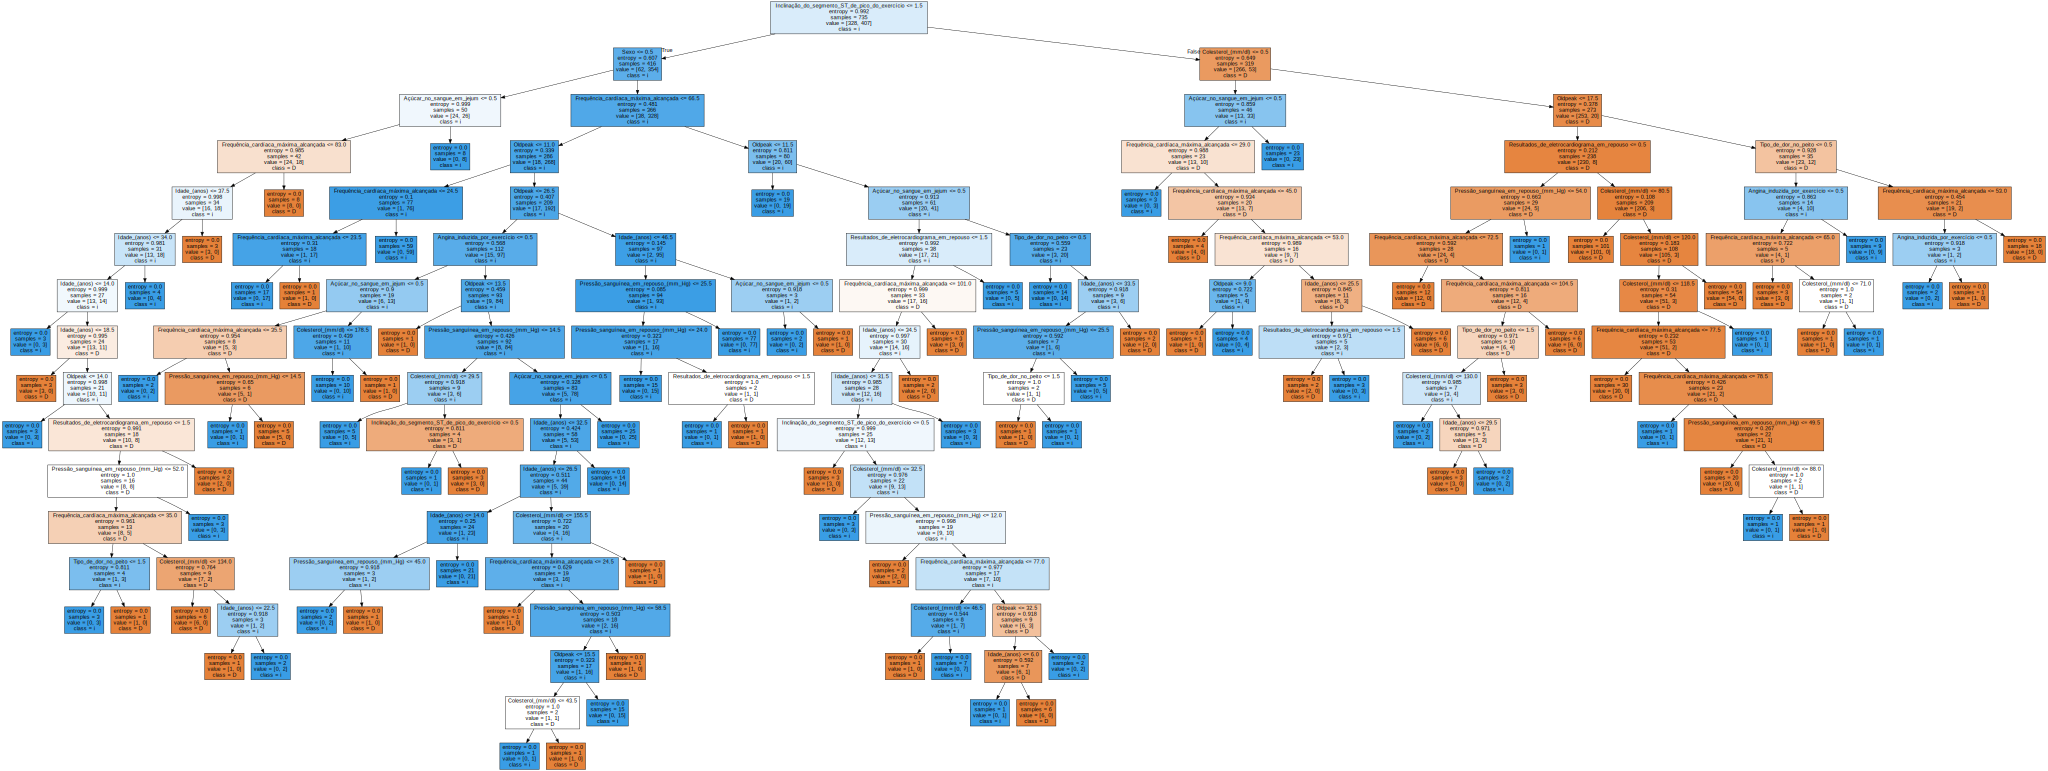

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

###Usando Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

The accuracy for 1 : 0.8629842180774749
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       1.00      0.63      0.78        82
           1       0.77      1.00      0.87       102

    accuracy                           0.84  

In [ ]:
ranking_dict['accuracy']['Random Forest Classifier'] = max(acc_RandF)
# print(ranking_dict['accuracy']['Random Forest Classifier'])

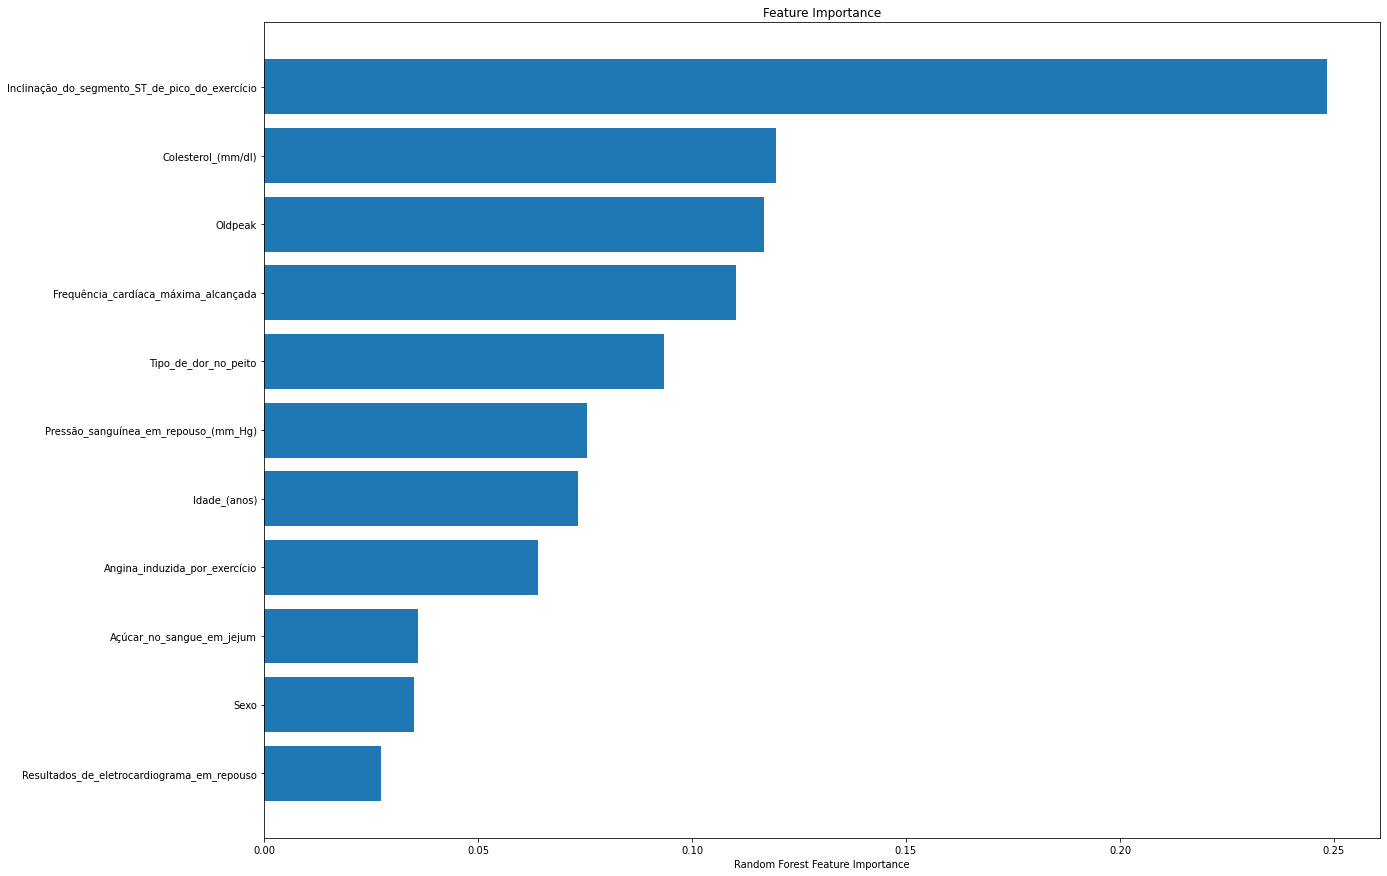

In [ ]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

###Usando XGboost

In [ ]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        82
           1       0.93      0.82      0.87       102

    accuracy                           0.87       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.87      0.87       184

The accuracy for 1 : 0.8751793400286945
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        82
           1       0.94      0.78      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 2 : 0.8616690578670492
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.62      0.76        82
           1       0.76      0.98      0.86       102

    accuracy                           0.82  

In [ ]:
ranking_dict['accuracy']['XGBoost'] = max(acc_XGB)
# print(ranking_dict['accuracy']['XGBoost'])

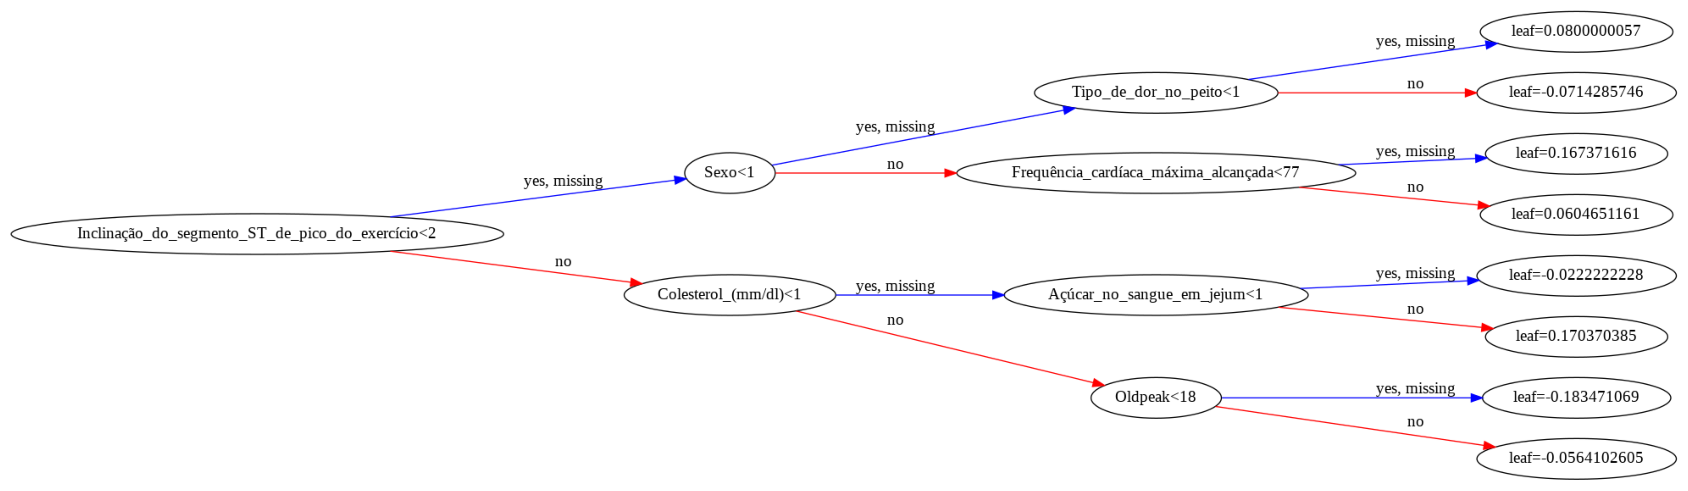

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf, num_trees=0, rankdir="LR", ax=ax)
plt.show()

##Conclusões

In [ ]:
df_ranking_dict = pd.DataFrame(ranking_dict)

df_ranking_dict['ranking_position'] = df_ranking_dict['accuracy'].rank(ascending=False)
df_ranking_dict_sorted = df_ranking_dict.sort_values(by='accuracy', ascending=False)

df_ranking_dict_sorted['ranking_position'] = df_ranking_dict_sorted['ranking_position'].astype(int)

df_ranking_dict_sorted

,accuracy,ranking_position
kNN,0.923003,1
RBF Kernel SVM,0.910808,2
Polinomial Kernel SVM,0.897298,3
Gaussian Naive Bayes,0.883788,4
Logistic Regression,0.880081,5
XGBoost,0.875179,6
Linear Kernel SVM,0.869082,7
Random Forest Classifier,0.862984,8
Sigmoid Kernel SVM,0.852104,9
Decision Tree Classifier,0.772956,10


In [ ]:
print(acc_KNN)

[0.9230033476805357, 0.8482783357245336, 0.835246293639407, 0.8296908959188601, 0.7763825163004106]


In [ ]:
final_model

KNeighborsClassifier(n_neighbors=32)

In [ ]:
pickle.dump(final_model, open('knn_model.sav', 'wb'))
pickle.dump(ro_scaler, open('ro_scaler.sav', 'wb'))